In [3]:
import imp 
import tree_functions as tree
imp.reload(tree)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time

In [4]:
n = 1000 
n_small = 100
z_range = 8
r_gen = 0.5
r_s_gen = 0.9
mean_gen = 0
sd_gen = 1 

fig_size = (12, 8)
fig_size1 = (8, 5.333)

figures_file = 'figures/' 
figures_param = '_n' + str(n) + '_' + 'r' + str(int(r_gen * 100)) + '_' + 'r_s' + \
                str(int(r_s_gen * 100)) + '_.png'

In [5]:
# plt.style.use('default')

In [6]:
# Initialize parent distribution
parent_distribution = tree.normal_distribution(n, z_range, mean_gen, sd_gen)
parent_distribution_small = tree.normal_distribution(n_small, z_range, mean_gen, sd_gen)


In [106]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

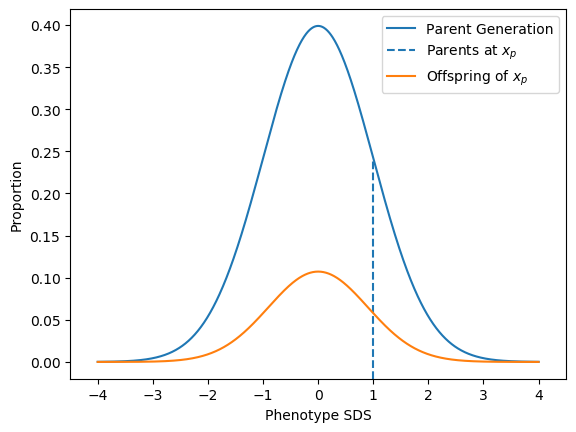

In [192]:
parent_index = tree.z_score_to_index(z_score=1, number_of_steps=n, \
                                     z_score_range=z_range)
single_offspring_distribution2 = tree.one_offspring_distribution(parent_distribution, \
                                                                 parent_index, 0.5, r_s_gen)
# plt.figure(figsize=fig_size1)
# plt.title('True (some) regression to the mean. Inheritance. r = 0.5.')
tree.plot_distribution(parent_distribution, label='Parent Generation')
plt.axvline(x=1, linestyle='--', \
            ymax=tree.f_norm(1,0,1)/0.41, label='Parents at $x_p$')
tree.plot_distribution(single_offspring_distribution2, label='Offspring of $x_p$')
# plt.axvline(x=0.5, linestyle='--', label='x = 0.5', color='orange')
plt.xlim(-4.5, 4.5)
plt.legend()
plt.savefig(figures_file + 'individual_offspring' + figures_param, dpi=300)
plt.show()

In [127]:
offspring_distributions_ = tree.offspring_distributions(parent_distribution_small, r_gen, r_s_gen)

In [153]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

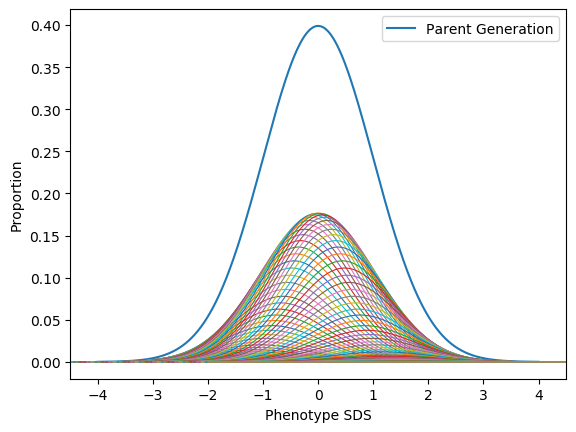

In [155]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution, label='Parent Generation')
tree.plot_distributions(offspring_distributions_) 
plt.legend()
plt.savefig(figures_file + 'offspring_distributions' + figures_param, dpi=300)
plt.show()

In [122]:

# Initialize total offspring distribution
total_offspring_distribution = \
tree.final_superimposed_distribution_all_area_adj(parent_distribution, r_gen, r_s_gen)  

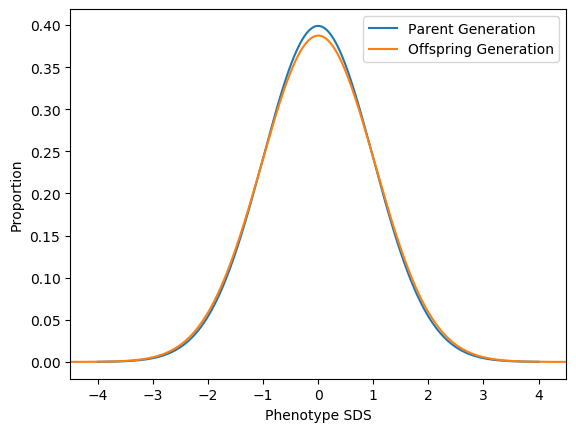

In [125]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution, label='Parent Generation') 
tree.plot_distribution(total_offspring_distribution, label='Offspring Generation') 
plt.legend()
plt.savefig(figures_file + 'offspring_generation' + figures_param, dpi=300)
plt.show()

In [190]:
print(tree.st_dev_of_distribution(parent_distribution))
print(tree.st_dev_of_distribution(total_offspring_distribution))

0.9994724998242689
1.0293685089662092


In [191]:
1.0293685089662092 / 0.9994724998242689

1.0299117876151638

In [156]:
step_percentile = tree.step_proportion_attributable_percentile(parent_distribution, r_gen, \
                                        r_s_gen, 0.2, total_offspring_distribution)

In [323]:
print(step_percentile)

[[[0.8, 1], [[[0.8, 1], 0.4263890080705017], [[0.6, 0.8], 0.25483399322911093], [[0.4, 0.6], 0.16778914641205833], [[0.2, 0.4], 0.10578208528302459], [[0.0, 0.2], 0.04520576700530366]]], [[0.6, 0.8], [[[0.8, 1], 0.2524243493923893], [[0.6, 0.8], 0.2505339190164547], [[0.4, 0.6], 0.21656439047368642], [[0.2, 0.4], 0.17587259787047277], [[0.0, 0.2], 0.10460474324699667]]], [[0.4, 0.6], [[[0.8, 1], 0.16793231306484066], [[0.6, 0.8], 0.21898416484085728], [[0.4, 0.6], 0.2261670441886042], [[0.2, 0.4], 0.21898416484085728], [[0.0, 0.2], 0.16793231306484074]]]]


In [216]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

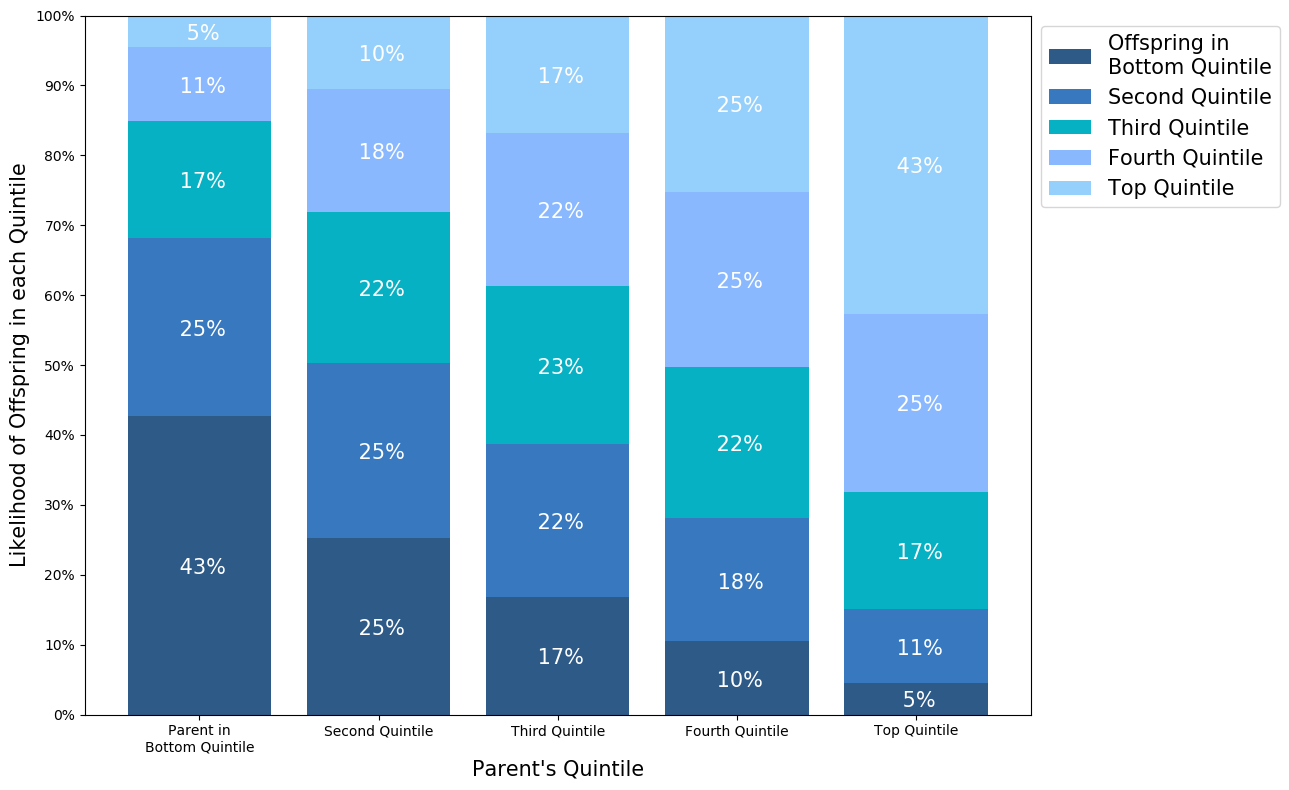

In [217]:
plt.figure(figsize=(13,8))
tree.bar_graph_step(step_percentile)
plt.tight_layout()
plt.savefig(figures_file + 'model_mobility' + figures_param, dpi=300)
plt.show()

Chetty

In [212]:
chetty_transposed = \
[[0.337, 0.242, 0.178, 0.134, 0.109],
[0.28, 0.242, 0.198, 0.16, 0.119],
 [0.184, 0.217, 0.221, 0.209, 0.17],
 [0.123, 0.176, 0.22, 0.244, 0.236],
 [0.075, 0.123, 0.183, 0.254, 0.365]
]

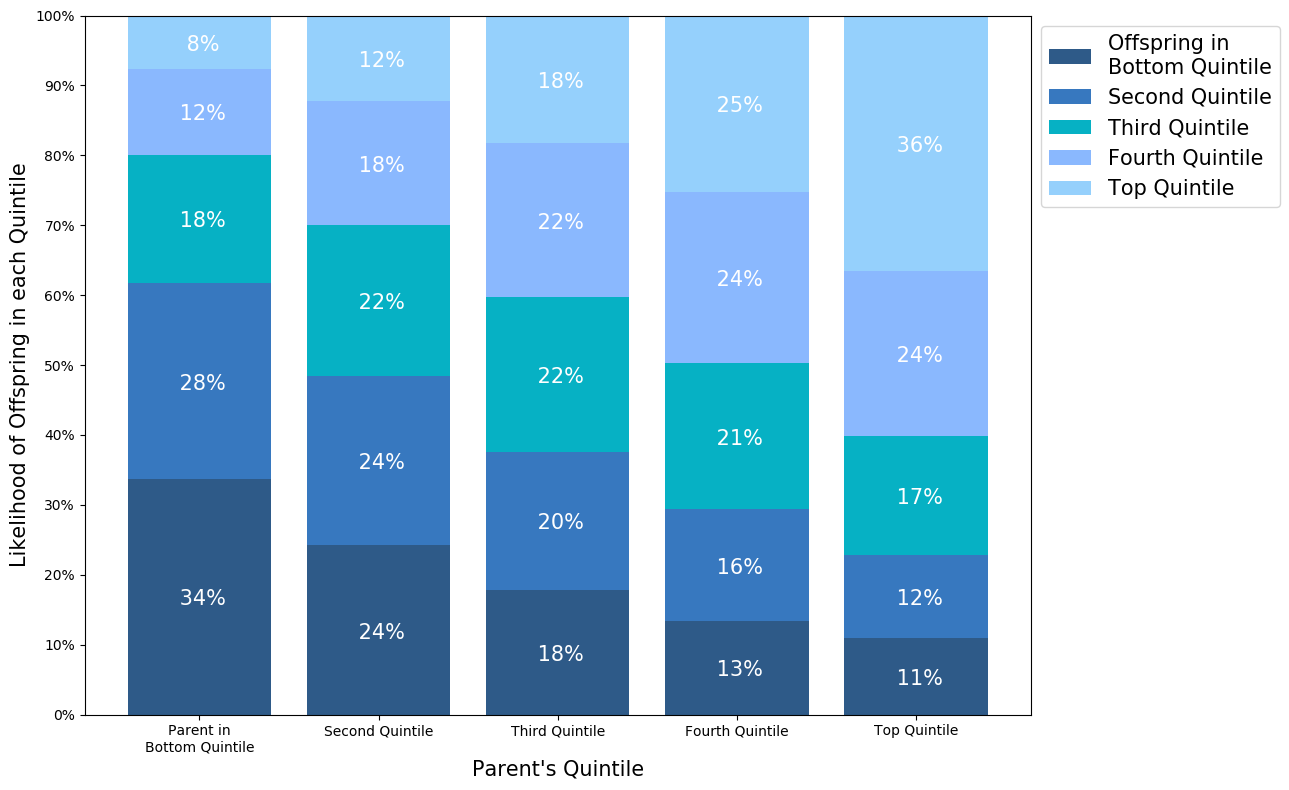

In [213]:
plt.figure(figsize=(13,8))
tree.plot_mobility(chetty_transposed)
plt.tight_layout()
plt.savefig(figures_file + 'chetty_mobility.png', dpi=300)
plt.show()

In [14]:
galton_motivating = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022396416573348264, 0.002244668911335578, 0.016835016835016835, 0.016930022573363433, 0.023728813559322035, 0.02937853107344633, 0.029646522234891677, 0.037800687285223365, 0.03634232121922626, 0.04561824729891957, 0.07255139056831923, 0.0853960396039604, 0.0973111395646607, 0.11140235910878113, 0.13692946058091288, 0.14868804664723032, 0.182370820668693, 0.1966205837173579, 0.20535714285714285, 0.25812619502868067, 0.31189083820662766, 0.3210161662817552, 0.35697399527186763, 0.43828715365239296, 0.4327485380116959, 0.4794007490636704, 0.5083333333333333, 0.5888324873096447, 0.5870967741935483, 0.631578947368421, 0.5961538461538461, 0.5952380952380952, 0.6329113924050633, 0.5490196078431373, 0.5869565217391305, 0.5882352941176471, 0.5833333333333334, 0.5909090909090909, 0.6875, 0.6, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [223]:
tree_problem_range = tree.step_tree_question_z_score(parent_distribution, r_gen, r_s_gen, \
                                                     z_score_increment=0.125, z_score_bound=8)

In [322]:
# n = 1000, r = 0.5, r_s = 0.9
print(tree_problem_range)

[1.0607234307163067e-06, 2.1684852989754026e-05, 5.707106322007794e-05, 0.00010941089586124643, 0.00019642915975198608, 0.0003314949913234215, 0.000521656593322475, 0.0008227159702653494, 0.001266687799774058, 0.0018595315508106345, 0.002753693553457202, 0.00390902693344451, 0.0055936404269450665, 0.007871286968642241, 0.010662177378533796, 0.014522941524591337, 0.01949165096783783, 0.025266806659316073, 0.032921510026308734, 0.041523355003031545, 0.05260204374128384, 0.06562716332920467, 0.07964955518775461, 0.09701506344945901, 0.11672113032723055, 0.13690297355447362, 0.1610720388007312, 0.18488703575973567, 0.2131670549357876, 0.24340653852698685, 0.2725140400702054, 0.30585104591041856, 0.340454661559264, 0.3721896956581155, 0.40833027076641876, 0.4414035405813149, 0.47802314722199507, 0.5144849166804878, 0.5463690818223952, 0.5817270872035313, 0.6161688644736479, 0.6461840248145267, 0.6782804029195254, 0.7058342744059827, 0.7344453613618807, 0.7619652367000046, 0.785113000407589,

In [12]:
tree_problem_range = np.array([1.0607234307163067e-06, 2.1684852989754026e-05, 5.707106322007794e-05, 0.00010941089586124643, 0.00019642915975198608, 0.0003314949913234215, 0.000521656593322475, 0.0008227159702653494, 0.001266687799774058, 0.0018595315508106345, 0.002753693553457202, 0.00390902693344451, 0.0055936404269450665, 0.007871286968642241, 0.010662177378533796, 0.014522941524591337, 0.01949165096783783, 0.025266806659316073, 0.032921510026308734, 0.041523355003031545, 0.05260204374128384, 0.06562716332920467, 0.07964955518775461, 0.09701506344945901, 0.11672113032723055, 0.13690297355447362, 0.1610720388007312, 0.18488703575973567, 0.2131670549357876, 0.24340653852698685, 0.2725140400702054, 0.30585104591041856, 0.340454661559264, 0.3721896956581155, 0.40833027076641876, 0.4414035405813149, 0.47802314722199507, 0.5144849166804878, 0.5463690818223952, 0.5817270872035313, 0.6161688644736479, 0.6461840248145267, 0.6782804029195254, 0.7058342744059827, 0.7344453613618807, 0.7619652367000046, 0.785113000407589, 0.8092582163634641, 0.8315966415416379, 0.8500544886513569, 0.8686074927039905, 0.8841354996229802, 0.8999453468224619, 0.9141939445331742, 0.9256848316297555, 0.9372622027581169, 0.9473930188193965, 0.9557198340696658, 0.9640640885240354, 0.9708359528101652, 0.9776424918109701, 0.9838322945503613, 0.9890511327386948, 0.994574440652951, 1.0])

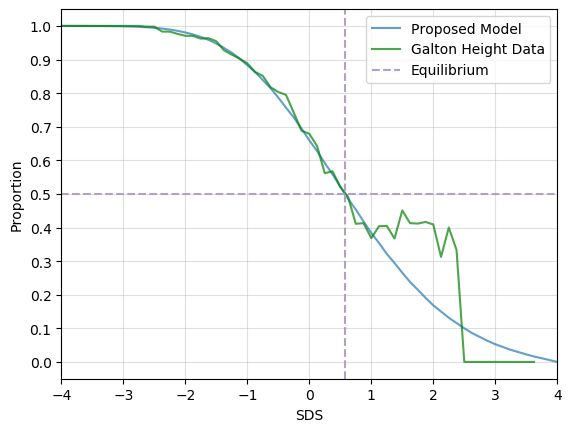

In [16]:
# plt.figure(figsize=fig_size)
# plt.xlim(-4.5, 4.5)
plt.xlim(-4,4)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.4)
plt.plot(np.arange(-4, 4.125, 0.125), 1 - tree_problem_range, alpha=0.7, label='Proposed Model')
plt.plot(np.arange(-4, 3.75, 0.125), 1 - galton_motivating, color='green', alpha=0.7, 
             label='Galton Height Data')
plt.axhline(y=0.5, linestyle='--', color='#b2a0c7', label='Equilibrium')
plt.axvline(x=0.575, linestyle='--', color='#b2a0c7')
plt.xlabel('SDS')
plt.ylabel('Proportion')
plt.legend()
plt.savefig(figures_file + 'motivating_z_score' + figures_param, dpi=300)
plt.show()

In [18]:
pers = list()
for value in np.arange(-4, 4.125, 0.125):
    pers.append(st.norm.cdf(value))
    
pers1 = list()
for value in np.arange(-4, 3.75, 0.125):
    pers1.append(st.norm.cdf(value))

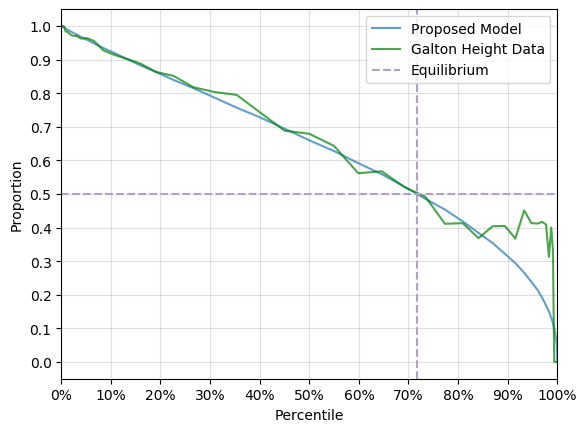

In [20]:
from matplotlib.ticker import PercentFormatter

# plt.figure(figsize=fig_size)
plt.xlim(0, 1)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.4)
plt.plot(pers, 1 - tree_problem_range, alpha=0.7, label='Proposed Model')
plt.plot(pers1, 1 - galton_motivating, color='green', alpha=0.7, label='Galton Height Data')
plt.axhline(y=0.5, linestyle='--', color='#b2a0c7')
plt.axvline(x=st.norm.cdf(0.575), linestyle='--', color='#b2a0c7', label='Equilibrium')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percentile')
plt.ylabel('Proportion')
plt.legend(loc='upper right')
plt.savefig(figures_file + 'motivating_percentile' + figures_param, dpi=300)
plt.show()

In [307]:
st.norm.cdf(0.575)

0.7173543515027994

In [ ]:
print()

In [68]:
y = np.arange(-1,1,0.02) + np.random.randn(100)

In [69]:
x = np.arange(-1,1,0.02) + np.random.randn(100)

In [75]:
x2 = (0.7 * x) + 3

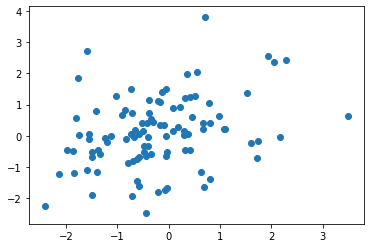

In [71]:
plt.scatter(x,y)

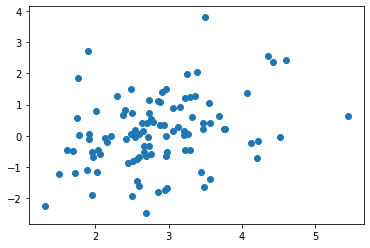

In [76]:
plt.scatter(x2,y)

In [77]:
np.corrcoef(x,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])

In [78]:
np.corrcoef(x2,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])